In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Load data
df = pd.read_csv('/Users/mac/Documents/project2/biased_leukemia_dataset.csv')

# 3. Preprocessing
# Drop Patient_ID
df = df.drop('Patient_ID', axis=1)

# Encode Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and Target
X = df.drop('Leukemia_Status', axis=1)
y = df['Leukemia_Status']

# Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification
])

# 5. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 7. Predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# 8. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3580/3580 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step - accuracy: 0.8368 - loss: 0.4439 - val_accuracy: 0.8495 - val_loss: 0.4268
Epoch 2/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - accuracy: 0.8511 - loss: 0.4218 - val_accuracy: 0.8495 - val_loss: 0.4260
Epoch 3/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/step - accuracy: 0.8506 - loss: 0.4220 - val_accuracy: 0.8495 - val_loss: 0.4262
Epoch 4/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 2s 491us/step - accuracy: 0.8498 - loss: 0.4225 - val_accuracy: 0.8495 - val_loss: 0.4260
Epoch 5/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8504 - loss: 0.4215 - val_accuracy: 0.8495 - val_loss: 0.4262
Epoch 6/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.8506 - loss: 0.4205 - val_accuracy: 0.8495 - val_loss: 0.4258
Epoch 7/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step - accuracy: 0.8521 - loss: 0.4177 - val_accuracy: 0.8495 - val_loss: 0.4256
Epoch 8/50
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.8510 - loss: 0.41

✅ SVM Model Accuracy: 0.8506

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     24360
           1       0.00      0.00      0.00      4279

    accuracy                           0.85     28639
   macro avg       0.43      0.50      0.46     28639
weighted avg       0.72      0.85      0.78     28639



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

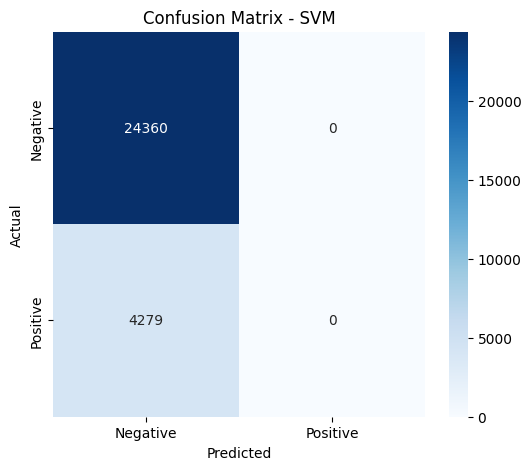

In [9]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data
df = pd.read_csv('/Users/mac/Documents/project2/biased_leukemia_dataset.csv')

# 3. Preprocessing
# Drop Patient_ID (ไม่ต้องใช้ในการทำนาย)
df = df.drop(['Patient_ID'], axis=1)

# Encode Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split X, y
X = df.drop('Leukemia_Status', axis=1)
y = df['Leukemia_Status']  # 0 = Negative, 1 = Positive (หลัง Encoding)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Create and Train SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred = svm_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ SVM Model Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()
